In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Чтобы графики показывались внутри ноутбука
%matplotlib inline

начало анализа

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Чтобы графики показывались внутри ноутбука
%matplotlib inline
df = pd.read_csv("S02-hw-dataset.csv")
print(df.head)
print(df.info)
print(df.describe)


<bound method NDFrame.head of     user_id    age country  purchases  revenue
0         1   25.0      FR          7      749
1         2   24.0      RU          5     1115
2         3   52.0      FR          7      399
3         4   31.0      RU          6      654
4         5    NaN      DE          6     1296
5         6  120.0      FR         -1      785
6         7   46.0      RU          0        0
7         8   28.0      CN          2      456
8         9   39.0      US          4      980
9        10   24.0      RU          7      511
10       11   24.0      US          4        0
11       12   20.0      CN          7     1652
12       13    NaN      US          9      630
13       14   36.0      DE          9     2358
14       15   57.0      FR          7      693
15       16   22.0      FR          3      183
16       17   32.0      FR          6     1608
17       18   24.0      RU          0        0
18       19   47.0      RU          3      432
19       20   31.0      RU    

пропуски, дубликаты, качество

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# пропуски
print(df.isna().mean())

print(df.isna().sum())

print(df.duplicated().sum())
# дублированные строки
print(df[df.duplicated()])

# поиск необычных подозрительных значений
# Подозрительные возраста
mask_age_implausible = (df["age"] < 14) | (df["age"] > 100)

# Отрицательные покупки
mask_neg_purchases = df["purchases"] < 0

# Нулевая/отрицательная выручка при положительных покупках
mask_zero_revenue_with_purchases = (df["revenue"] <= 0) & (df["purchases"] > 0)

# Все подозрительные записи
suspicious_rows = df[mask_age_implausible | mask_neg_purchases | mask_zero_revenue_with_purchases]
print(suspicious_rows)


user_id      0.00000
age          0.04878
country      0.00000
purchases    0.00000
revenue      0.00000
dtype: float64
user_id      0
age          2
country      0
purchases    0
revenue      0
dtype: int64
1
    user_id   age country  purchases  revenue
40       10  24.0      RU          7      511
    user_id    age country  purchases  revenue
5         6  120.0      FR         -1      785
10       11   24.0      US          4        0
20       21    5.0      RU          8     1488


Мы посчитали долю пропусков и обнаружили, что в столбце age есть отсутствующие значения. Также нашёлся как минимум один полный дубликат строки.
При проверке логики данных обнаружены подозрительные записи: возраст меньше 14 лет или больше 100 лет, отрицательное количество покупок и случаи, когда при положительном числе покупок выручка равна нулю.

EDA

In [11]:
print(df["country"].value_counts())

print(df["country"].value_counts(normalize=True))

# считаем по странам средний возраст, среднее число покупок, суммарную выручку
grouped_country = df.groupby("country").agg(
    mean_age=("age", "mean"),
    mean_purchases=("purchases", "mean"),
    total_revenue=("revenue", "sum")
)
print(grouped_country)

# коридор по возрасту
bins = [0, 18, 30, 45, 60, 120]
labels = ["0-17", "18-29", "30-44", "45-59", "60+"]

df["age_group"] = pd.cut(df["age"], bins=bins, labels=labels)

print(df["age_group"].value_counts())

# средняя выруска по группам возрастов
print(df.groupby("age_group")["revenue"].mean())



country
RU    13
FR    12
US     8
DE     6
CN     2
Name: count, dtype: int64
country
RU    0.317073
FR    0.292683
US    0.195122
DE    0.146341
CN    0.048780
Name: proportion, dtype: float64
          mean_age  mean_purchases  total_revenue
country                                          
CN       24.000000        4.500000           2108
DE       34.600000        6.500000           8673
FR       46.250000        4.250000           8111
RU       30.076923        4.769231          10271
US       36.714286        4.625000           4459
age_group
30-44    14
18-29    13
45-59     9
0-17      2
60+       1
Name: count, dtype: int64
age_group
0-17     1296.000000
18-29     565.538462
30-44    1108.214286
45-59     605.777778
60+       785.000000
Name: revenue, dtype: float64


C:\Users\podne\AppData\Local\Temp\ipykernel_12572\1097507341.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby("age_group")["revenue"].mean())


В датасете 41 пользователь из 5 стран. Больше всего наблюдений из России (32%) и Франции (29%), затем идут США (20%), Германия (15%) и Китай (5%).
По странам Россия даёт наибольшую суммарную выручку (10 271), но при этом самые «ценные» пользователи в среднем — из Германии: у них и наибольшее среднее число покупок (6.5), и самая высокая средняя выручка на пользователя (1445.5). Пользователи из Китая моложе всех (средний возраст ≈24 года), а во Франции, наоборот, самая возрастная аудитория (46 лет).
При разбиении по возрастным группам большинство пользователей попадает в диапазоны 18–29 и 30–44 лет. Наибольшая средняя выручка наблюдается у группы 30–44 года (1108), а также у небольшой группы до 18 лет (1296, но там всего 2 наблюдения, поэтому вывод ненадёжный).

визуализация

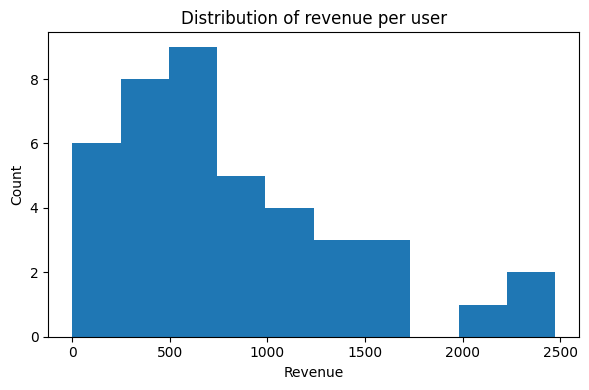

<Figure size 600x400 with 0 Axes>

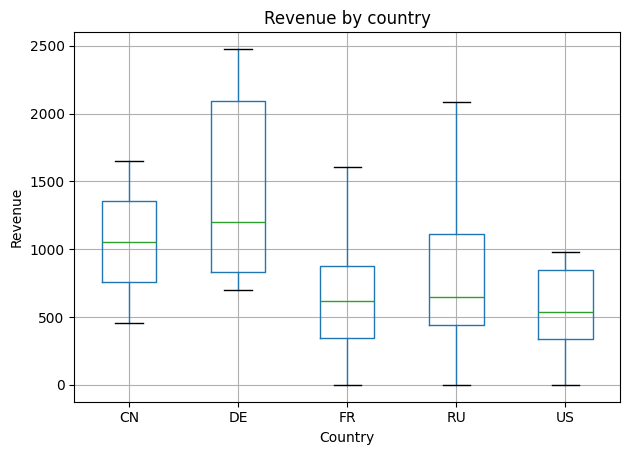

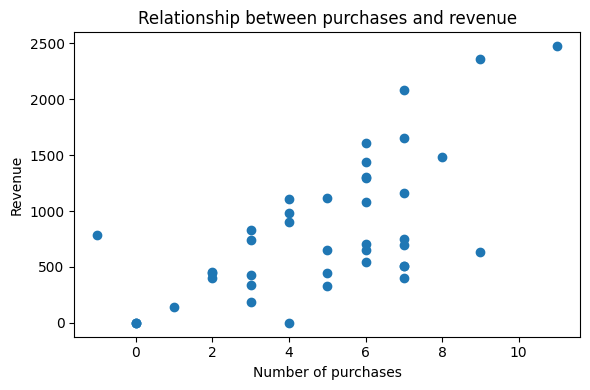

In [6]:
plt.figure(figsize=(6, 4))
plt.hist(df["revenue"], bins=10)  # можно поиграть с bins
plt.xlabel("Revenue")
plt.ylabel("Count")
plt.title("Distribution of revenue per user")
plt.tight_layout()
plt.savefig("figures/revenue_hist.png")
plt.show()

plt.figure(figsize=(6, 4))
df.boxplot(column="revenue", by="country")
plt.title("Revenue by country")
plt.suptitle("") 
plt.xlabel("Country")
plt.ylabel("Revenue")
plt.tight_layout()
plt.savefig("figures/revenue_hist_country.png")
plt.show()

plt.figure(figsize=(6, 4))
plt.scatter(df["purchases"], df["revenue"])
plt.xlabel("Number of purchases")
plt.ylabel("Revenue")
plt.title("Relationship between purchases and revenue")
plt.tight_layout()
plt.savefig("figures/revenue_purchases.png")
plt.show()